## Denoising Diffusion Probabilistic Models

In [3]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 36.4 MB/s eta 0:00:00


In [4]:
import torch
import numpy as np
from data import DiffSet
import pytorch_lightning as pl
from model import DiffusionModel
from model import *
from torch.utils.data import DataLoader
import imageio
import glob

### Set model parameters

In [5]:
# Training hyperparameters
diffusion_steps = 1000

#choose a dataset:
dataset_choice = "CIFAR"
#dataset_choice = "MNIST"
#dataset_choice = "Fashion"

max_epoch = 10
batch_size = 128

# Loading parameters
load_model = False
load_version_num = 1

### Load dataset and train model

In [6]:
# Code for optionally loading model
pass_version = None
last_checkpoint = None

if load_model:
    pass_version = load_version_num
    last_checkpoint = glob.glob(
        f"./lightning_logs/{dataset_choice}/version_{load_version_num}/checkpoints/*.ckpt"
    )[-1]

In [7]:
# Load Trainer model
tb_logger = pl.loggers.TensorBoardLogger(
    "lightning_logs/",
    name=dataset_choice,
    version=pass_version,
)
#trainer = pl.Trainer(max_epochs=max_epoch)
trainer = pl.Trainer(max_epochs=max_epoch)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [8]:
# Create datasets and data loaders
train_dataset = DiffSet(True, dataset_choice)
val_dataset = DiffSet(False, dataset_choice)

train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=4, shuffle=True)


# Create model and trainer
if load_model:
    model = DiffusionModel.load_from_checkpoint(last_checkpoint, in_size=train_dataset.size*train_dataset.size, t_range=diffusion_steps, img_depth=train_dataset.depth)
else:
    model = DiffusionModel(train_dataset.size*train_dataset.size, diffusion_steps, train_dataset.depth)

#UNet 2+
'''
# Create model and trainer
if load_model:
    model = DiffusionModel_2.load_from_checkpoint(last_checkpoint, in_size=train_dataset.size*train_dataset.size, t_range=diffusion_steps, img_depth=train_dataset.depth)
else:
    model = DiffusionModel_2(train_dataset.size*train_dataset.size, diffusion_steps, train_dataset.depth)


#UNet 3

# Create model and trainer
if load_model:
    model = DiffusionModel_3.load_from_checkpoint(last_checkpoint, in_size=train_dataset.size*train_dataset.size, t_range=diffusion_steps, img_depth=train_dataset.depth)
else:
    model = DiffusionModel_3(train_dataset.size*train_dataset.size, diffusion_steps, train_dataset.depth)
'''

100%|██████████| 170498071/170498071 [00:18<00:00, 9034885.32it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


'\n# Create model and trainer\nif load_model:\n    model = DiffusionModel_2.load_from_checkpoint(last_checkpoint, in_size=train_dataset.size*train_dataset.size, t_range=diffusion_steps, img_depth=train_dataset.depth)\nelse:\n    model = DiffusionModel_2(train_dataset.size*train_dataset.size, diffusion_steps, train_dataset.depth)\n\n\n#UNet 3\n\n# Create model and trainer\nif load_model:\n    model = DiffusionModel_3.load_from_checkpoint(last_checkpoint, in_size=train_dataset.size*train_dataset.size, t_range=diffusion_steps, img_depth=train_dataset.depth)\nelse:\n    model = DiffusionModel_3(train_dataset.size*train_dataset.size, diffusion_steps, train_dataset.depth)\n'

In [9]:
# Train model
history = trainer.fit(model, train_loader, val_loader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name  | Type       | Params
--------------------------------------
0  | inc   | DoubleConv | 38.8 K
1  | down1 | Down       | 295 K 
2  | down2 | Down       | 1.2 M 
3  | down3 | Down       | 2.4 M 
4  | up1   | Up         | 6.2 M 
5  | up2   | Up         | 1.5 M 
6  | up3   | Up         | 406 K 
7  | outc  | OutConv    | 195   
8  | sa1   | SAWrapper  | 395 K 
9  | sa2   | SAWrapper  | 395 K 
10 | sa3   | SAWrapper  | 99.6 K
--------------------------------------
12.9 M    Trainable params
0         Non-trainable params
12.9 M    Total params
51.681    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


### Sample from model

In [10]:
import matplotlib.pyplot as plt

gif_shape = [1, 1]
sample_batch_size = 1
#sample_batch_size = gif_shape[0] * gif_shape[1]
n_hold_final = 100

# Generate samples from denoising process
gen_samples = []
x = torch.randn((sample_batch_size, train_dataset.depth, train_dataset.size, train_dataset.size))
print(model.t_range)
sample_steps = torch.arange(model.t_range-1, 0, -1)
for t in sample_steps:
    x = model.denoise_sample(x, t)
    if t % 50 == 0:
        gen_samples.append(x)
for _ in range(n_hold_final):
    gen_samples.append(x)
gen_samples = torch.stack(gen_samples, dim=0).moveaxis(2, 4).squeeze(-1)
gen_samples = (gen_samples.clamp(-1, 1) + 1) / 2
'''
torch.Tensor.ndim = property(lambda self: len(self.shape))
arr = []
arr = [0 for i in range(50)]
x_axis = torch.linspace(-5,5,50)
for r in range(50):
  print("loss : ")
  print(model.get_loss(gen_samples,r))
  arr[r] = model.get_loss(gen_samples,r).detach()

plt.plot(x_axis,arr)
'''

1000


'\ntorch.Tensor.ndim = property(lambda self: len(self.shape))\narr = []\narr = [0 for i in range(50)]\nx_axis = torch.linspace(-5,5,50)\nfor r in range(50):\n  print("loss : ")\n  print(model.get_loss(gen_samples,r))\n  arr[r] = model.get_loss(gen_samples,r).detach()\n\nplt.plot(x_axis,arr)\n'

In [12]:
# Process samples and save as gif
gen_samples = (gen_samples * 255).type(torch.uint8)
gen_samples = gen_samples.reshape(-1, gif_shape[0], gif_shape[1], train_dataset.size, train_dataset.size, train_dataset.depth)

def stack_samples(gen_samples, stack_dim):
    gen_samples = list(torch.split(gen_samples, 1, dim=1))
    for i in range(len(gen_samples)):
        gen_samples[i] = gen_samples[i].squeeze(1)
    return torch.cat(gen_samples, dim=stack_dim)

gen_samples = stack_samples(gen_samples, 2)
gen_samples = stack_samples(gen_samples, 2)


imageio.mimsave(
    f"/content/pred/pred.gif",
    list(gen_samples),
    duration=20
)

print(gen_samples[0].shape)


torch.Size([32, 32, 3])


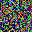

In [13]:
from IPython.display import display, Image

path1 = "/content/pred/pred.gif"

img = Image(path1)
display(img)


In [2]:
from PIL import Image
from PIL import GifImagePlugin

imageObject = Image.open(f"/content/pred/pred.gif")
print(imageObject.n_frames)

# Display individual frames from the loaded animated GIF file
for frame in range(0,imageObject.n_frames):
    imageObject.seek(frame)
    imageObject.show()
print("output:")
imageObject.show(frame)

20
output:


##**FID SCORE :**

In [20]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10


def scale_images(images, new_shape):

  images_list = list()
  for image in images:
    # resize with nearest neighbor interpolation
    new_image = resize(image, new_shape, 0)
    # store
    images_list.append(new_image)
  return asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
  # calculate activations
  act1 = model.predict(images1)
  act2 = model.predict(images2)
  # calculate mean and covariance statistics
  mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
  mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
  # calculate sum squared difference between means
  ssdiff = numpy.sum((mu1 - mu2)**2.0)
  # calculate sqrt of product between cov
  covmean = sqrtm(sigma1.dot(sigma2))
  # check and correct imaginary numbers from sqrt
  if iscomplexobj(covmean):
    covmean = covmean.real
  # calculate score
  fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
  print("mu1 value : ", mu1)
  print("sigma1 value : ", sigma1)
  print("mu2 value : ", mu2)
  print("sigma2 value : ", sigma2)
  return fid

# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(75,75,3))
# load cifar10 images
(images1, _), (images2, _) = cifar10.load_data()
shuffle(images1)
images2 = gen_samples[0]
images1 = images1[:10000]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.to(torch.float32)
# resize images
images1 = scale_images(images1, (75,75,3))
images2 = scale_images(images2, (75,75,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

Loaded (10000, 32, 32, 3) torch.Size([32, 32, 3])
Scaled (10000, 75, 75, 3) (32, 75, 75, 3)
1/1 [==============================] - 0s 26ms/step
mu1 value :  [0.9907491  0.4135731  0.6930216  ... 0.22804575 0.3871828  1.4238368 ]
sigma1 value :  [[1.33619791 0.12155223 0.10747612 ... 0.03256315 0.11350484 0.16477531]
 [0.12155223 0.8246883  0.04709898 ... 0.09387528 0.23026526 0.22147307]
 [0.10747612 0.04709898 1.22975074 ... 0.04023282 0.13334341 0.00573337]
 ...
 [0.03256315 0.09387528 0.04023282 ... 0.60671208 0.15055316 0.13693469]
 [0.11350484 0.23026526 0.13334341 ... 0.15055316 1.22455905 0.22753145]
 [0.16477531 0.22147307 0.00573337 ... 0.13693469 0.22753145 2.85738967]]
mu2 value :  [0.87159914 0.18664709 0.93982255 ... 0.52138597 0.59381247 0.33641446]
sigma2 value :  [[ 0.3589502  -0.03211324  0.11143462 ...  0.10472706  0.00281757
  -0.02815504]
 [-0.03211324  0.14256765 -0.04695416 ...  0.07943254  0.19479376
   0.0227621 ]
 [ 0.11143462 -0.04695416  0.665987   ...  0.058

OTHER TRY OUT

In [ ]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial


def calculate_clip_score(images, prompts):
    images_int = transforms.ToTensor(images)
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)

clip_score_fn = partial(clip_score, model_name_or_path="model")
prompts = "E"

sd_clip_score = calculate_clip_score(gen_samples[0], prompts)
print(f"CLIP score: {sd_clip_score}")

In [ ]:
!pip install torchmetrics

In [ ]:
import torchvision
import torchmetrics
from numpy.random import shuffle
from keras.datasets import cifar10

In [ ]:
from torchvision.transforms import functional as F

(images1, _), (images2, _) = cifar10.load_data()
shuffle(images1)
images1 = images1[:10000]
print('Loaded', images1.shape, images2.shape)

real_images = images1
fake_images = images2
print(real_images.shape)

In [ ]:
!pip install torch-fidelity
!pip install torchmetrics[image]

In [ ]:
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance(normalize=True)
fid.update(real_images, real=True)
fid.update(fake_images, real=False)

print(f"FID: {float(fid.compute())}")

In [ ]:
!pip install pytorch-fid

In [ ]:
import numpy as np
import pytest
import torch
from PIL import Image

from pytorch_fid import fid_score, inception


@pytest.fixture
def device():
    return torch.device('cpu')


def test_calculate_fid_given_statistics(mocker, tmp_path, device):
    dim = 2048
    m1, m2 = np.zeros((dim,)), np.ones((dim,))
    sigma = np.eye(dim)

    def dummy_statistics(path, model, batch_size, dims, device, num_workers):
        if path.endswith('1'):
            return m1, sigma
        elif path.endswith('2'):
            return m2, sigma
        else:
            raise ValueError

    mocker.patch('pytorch_fid.fid_score.compute_statistics_of_path',
                 side_effect=dummy_statistics)

    dir_names = ['1', '2']
    paths = []
    for name in dir_names:
        path = tmp_path / name
        path.mkdir()
        paths.append(str(path))

    fid_value = fid_score.calculate_fid_given_paths(paths,
                                                    batch_size=dim,
                                                    device=device,
                                                    dims=dim,
                                                    num_workers=0)

    # Given equal covariance, FID is just the squared norm of difference
    assert fid_value == np.sum((m1 - m2)**2)


def test_compute_statistics_of_path(mocker, tmp_path, device):
    model = mocker.MagicMock(inception.InceptionV3)()
    model.side_effect = lambda inp: [inp.mean(dim=(2, 3), keepdim=True)]

    size = (4, 4, 3)
    arrays = [np.zeros(size), np.ones(size) * 0.5, np.ones(size)]
    images = [(arr * 255).astype(np.uint8) for arr in arrays]

    paths = []
    for idx, image in enumerate(images):
        paths.append(str(tmp_path / '{}.png'.format(idx)))
        Image.fromarray(image, mode='RGB').save(paths[-1])

    stats = fid_score.compute_statistics_of_path(str(tmp_path), model,
                                                 batch_size=len(images),
                                                 dims=3,
                                                 device=device,
                                                 num_workers=0)

    assert np.allclose(stats[0], np.ones((3,)) * 0.5, atol=1e-3)
    assert np.allclose(stats[1], np.ones((3, 3)) * 0.25)


def test_compute_statistics_of_path_from_file(mocker, tmp_path, device):
    model = mocker.MagicMock(inception.InceptionV3)()

    mu = np.random.randn(5)
    sigma = np.random.randn(5, 5)

    path = tmp_path / 'stats.npz'
    with path.open('wb') as f:
        np.savez(f, mu=mu, sigma=sigma)

    stats = fid_score.compute_statistics_of_path(str(path), model,
                                                 batch_size=1,
                                                 dims=5,
                                                 device=device,
                                                 num_workers=0)

    assert np.allclose(stats[0], mu)
    assert np.allclose(stats[1], sigma)


def test_image_types(tmp_path):
    in_arr = np.ones((24, 24, 3), dtype=np.uint8) * 255
    in_image = Image.fromarray(in_arr, mode='RGB')

    paths = []
    for ext in fid_score.IMAGE_EXTENSIONS:
        paths.append(str(tmp_path / 'img.{}'.format(ext)))
        in_image.save(paths[-1])

    dataset = fid_score.ImagePathDataset(paths)

    for img in dataset:
        assert np.allclose(np.array(img), in_arr)

In [ ]:
import os
import pathlib
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser

import numpy as np
import torch
import torchvision.transforms as TF
from PIL import Image
from scipy import linalg
from torch.nn.functional import adaptive_avg_pool2d

try:
    from tqdm import tqdm
except ImportError:
    # If tqdm is not available, provide a mock version of it
    def tqdm(x):
        return x

from pytorch_fid.inception import InceptionV3

parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
parser.add_argument('--batch-size', type=int, default=50,
                    help='Batch size to use')
parser.add_argument('--num-workers', type=int,
                    help=('Number of processes to use for data loading. '
                          'Defaults to `min(8, num_cpus)`'))
parser.add_argument('--device', type=str, default=None,
                    help='Device to use. Like cuda, cuda:0 or cpu')
parser.add_argument('--dims', type=int, default=2048,
                    choices=list(InceptionV3.BLOCK_INDEX_BY_DIM),
                    help=('Dimensionality of Inception features to use. '
                          'By default, uses pool3 features'))
parser.add_argument('--save-stats', action='store_true',
                    help=('Generate an npz archive from a directory of samples. '
                          'The first path is used as input and the second as output.'))
parser.add_argument('path', type=str, nargs=2,
                    help=('Paths to the generated images or '
                          'to .npz statistic files'))

IMAGE_EXTENSIONS = {'bmp', 'jpg', 'jpeg', 'pgm', 'png', 'ppm',
                    'tif', 'tiff', 'webp'}


class ImagePathDataset(torch.utils.data.Dataset):
    def __init__(self, files, transforms=None):
        self.files = files
        self.transforms = transforms

    def __len__(self):
        return len(self.files)

    def __getitem__(self, i):
        path = self.files[i]
        img = Image.open(path).convert('RGB')
        if self.transforms is not None:
            img = self.transforms(img)
        return img


def get_activations(files, model, batch_size=50, dims=2048, device='cpu',
                    num_workers=1):
    """Calculates the activations of the pool_3 layer for all images.

    Params:
    -- files       : List of image files paths
    -- model       : Instance of inception model
    -- batch_size  : Batch size of images for the model to process at once.
                     Make sure that the number of samples is a multiple of
                     the batch size, otherwise some samples are ignored. This
                     behavior is retained to match the original FID score
                     implementation.
    -- dims        : Dimensionality of features returned by Inception
    -- device      : Device to run calculations
    -- num_workers : Number of parallel dataloader workers

    Returns:
    -- A numpy array of dimension (num images, dims) that contains the
       activations of the given tensor when feeding inception with the
       query tensor.
    """
    model.eval()

    if batch_size > len(files):
        print(('Warning: batch size is bigger than the data size. '
               'Setting batch size to data size'))
        batch_size = len(files)

    dataset = ImagePathDataset(files, transforms=TF.ToTensor())
    dataloader = torch.utils.data.DataLoader(dataset,
                                             batch_size=batch_size,
                                             shuffle=False,
                                             drop_last=False,
                                             num_workers=num_workers)

    pred_arr = np.empty((len(files), dims))

    start_idx = 0

    for batch in tqdm(dataloader):
        batch = batch.to(device)

        with torch.no_grad():
            pred = model(batch)[0]

        # If model output is not scalar, apply global spatial average pooling.
        # This happens if you choose a dimensionality not equal 2048.
        if pred.size(2) != 1 or pred.size(3) != 1:
            pred = adaptive_avg_pool2d(pred, output_size=(1, 1))

        pred = pred.squeeze(3).squeeze(2).cpu().numpy()

        pred_arr[start_idx:start_idx + pred.shape[0]] = pred

        start_idx = start_idx + pred.shape[0]

    return pred_arr


def calculate_frechet_distance(mu1, sigma1, mu2, sigma2, eps=1e-6):
    """Numpy implementation of the Frechet Distance.
    The Frechet distance between two multivariate Gaussians X_1 ~ N(mu_1, C_1)
    and X_2 ~ N(mu_2, C_2) is
            d^2 = ||mu_1 - mu_2||^2 + Tr(C_1 + C_2 - 2*sqrt(C_1*C_2)).

    Stable version by Dougal J. Sutherland.

    Params:
    -- mu1   : Numpy array containing the activations of a layer of the
               inception net (like returned by the function 'get_predictions')
               for generated samples.
    -- mu2   : The sample mean over activations, precalculated on an
               representative data set.
    -- sigma1: The covariance matrix over activations for generated samples.
    -- sigma2: The covariance matrix over activations, precalculated on an
               representative data set.

    Returns:
    --   : The Frechet Distance.
    """

    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    assert mu1.shape == mu2.shape, \
        'Training and test mean vectors have different lengths'
    assert sigma1.shape == sigma2.shape, \
        'Training and test covariances have different dimensions'

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1)
            + np.trace(sigma2) - 2 * tr_covmean)


def calculate_activation_statistics(files, model, batch_size=50, dims=2048,
                                    device='cpu', num_workers=1):
    """Calculation of the statistics used by the FID.
    Params:
    -- files       : List of image files paths
    -- model       : Instance of inception model
    -- batch_size  : The images numpy array is split into batches with
                     batch size batch_size. A reasonable batch size
                     depends on the hardware.
    -- dims        : Dimensionality of features returned by Inception
    -- device      : Device to run calculations
    -- num_workers : Number of parallel dataloader workers

    Returns:
    -- mu    : The mean over samples of the activations of the pool_3 layer of
               the inception model.
    -- sigma : The covariance matrix of the activations of the pool_3 layer of
               the inception model.
    """
    act = get_activations(files, model, batch_size, dims, device, num_workers)
    mu = np.mean(act, axis=0)
    sigma = np.cov(act, rowvar=False)
    return mu, sigma


def compute_statistics_of_path(path, model, batch_size, dims, device,
                               num_workers=1):
    if path.endswith('.npz'):
        with np.load(path) as f:
            m, s = f['mu'][:], f['sigma'][:]
    else:
        path = pathlib.Path(path)
        files = sorted([file for ext in IMAGE_EXTENSIONS
                       for file in path.glob('*.{}'.format(ext))])
        m, s = calculate_activation_statistics(files, model, batch_size,
                                               dims, device, num_workers)

    return m, s


def calculate_fid_given_paths(paths, batch_size, device, dims, num_workers=1):
    """Calculates the FID of two paths"""
    for p in paths:
        if not os.path.exists(p):
            raise RuntimeError('Invalid path: %s' % p)

    block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]

    model = InceptionV3([block_idx]).to(device)

    m1, s1 = compute_statistics_of_path(paths[0], model, batch_size,
                                        dims, device, num_workers)
    m2, s2 = compute_statistics_of_path(paths[1], model, batch_size,
                                        dims, device, num_workers)
    fid_value = calculate_frechet_distance(m1, s1, m2, s2)

    return fid_value


def save_fid_stats(paths, batch_size, device, dims, num_workers=1):
    """Calculates the FID of two paths"""
    if not os.path.exists(paths[0]):
        raise RuntimeError('Invalid path: %s' % paths[0])

    if os.path.exists(paths[1]):
        raise RuntimeError('Existing output file: %s' % paths[1])

    block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]

    model = InceptionV3([block_idx]).to(device)

    print(f"Saving statistics for {paths[0]}")

    m1, s1 = compute_statistics_of_path(paths[0], model, batch_size,
                                        dims, device, num_workers)

    np.savez_compressed(paths[1], mu=m1, sigma=s1)


def main():
    args = parser.parse_args()

    if args.device is None:
        device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')
    else:
        device = torch.device(args.device)

    if args.num_workers is None:
        try:
            num_cpus = len(os.sched_getaffinity(0))
        except AttributeError:
            # os.sched_getaffinity is not available under Windows, use
            # os.cpu_count instead (which may not return the *available* number
            # of CPUs).
            num_cpus = os.cpu_count()

        num_workers = min(num_cpus, 8) if num_cpus is not None else 0
    else:
        num_workers = args.num_workers

    if args.save_stats:
        save_fid_stats(args.path, args.batch_size, device, args.dims, num_workers)
        return

    fid_value = calculate_fid_given_paths(args.path,
                                          args.batch_size,
                                          device,
                                          args.dims,
                                          num_workers)
    print('FID: ', fid_value)


if __name__ == '__main__':
    main()